In [128]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

from formation_channels import * 


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [129]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
           
print('obtain index of the SFRD models that we want to highlight')
print('-----')
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD, (MSSFRnameslist[ind_SFRD]))
        print()
        
MSSFRheaderDict =  {'000':'.0.0.0', '111':'.1.1.1', '112':'.1.1.2', '113':'.1.1.3', '121':'.1.2.1', '122':'.1.2.2', '123':'.1.2.3', '131':'.1.3.1', '132':'.1.3.2', '133':'.1.3.3', '211':'.2.1.1',\
                    '212':'.2.1.2', '213':'.2.1.3', '221':'.2.2.1', '222':'.2.2.2', '223':'.2.2.3', '231':'.2.3.1', '232':'.2.3.2', '233':'.2.3.3', '311':'.3.1.1', '312':'.3.1.2', '313':'.3.1.3', '321':'.3.2.1', \
                    '322':'.3.2.2', '323':'.3.2.3', '331':'.3.3.1', '332':'.3.3.2', '333':'.3.3.3'}    


obtain index of the SFRD models that we want to highlight
-----
0 .0.0.0 000

16 .2.3.1 231

20 .3.1.2 312



In [130]:
# DCOname ='BHNS'

# csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_0/formationRatesTotalAndPerChannel_'  + DCOname + '.csv'     

# df_name = csvPath
# df = pd.read_csv(df_name, index_col=0)


# print(df)

In [139]:
def plotFormationChannelRates_vbars(csvFilePath='None'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,14), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    channelColorDict = {'I_classic':'#118AB2', 'II_only_stable_MT':'#EF476F',  'III_single_core_CE':'#FFD166', 'IV_double_core_CE':'#073B4C', 'V_other':'gray'}
    List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    
    channel_names = ['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']
    
    
    

    
    Zinitial = [0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
   0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
   0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
   0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
   0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
   0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
   0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
   0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]
    nZ = len(Zinitial)
    
    dx = 0.4 #0.3

    dxlen = (2*dx)/nZ
    
    for ind_t, DCOtype in enumerate(Types):

        axe = axes[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        
   
        path_name = csvFilePath + 'formationRatesTotalAndPerChannel_'+ DCOname +'_.csv'
        df = pd.read_csv(path_name, index_col=0)
        
        for ind_bps, bps_name in enumerate(BPSnameslist):
            ratesRatio_low = np.zeros(nZ)
            ratesRatio     = np.zeros(nZ)
            
            
            

#             x_positions_ = range(nModels)
#             xx_ = dxrange
            x_positions = np.linspace(-dx, dx, nZ+1) 
            x_positions = ind_bps +  (x_positions[1:]+x_positions[:-1])/2   # take the center of the bins

#             print('len xx', len(x_positions))
            
            
            key_ = bps_name + ' ' + 'total' + '  [Msun^{-1}]'
            totalrates  = df[key_]
#             print(len(totalrates))

                
                
            for ind_c, whichChannel in enumerate(channel_names):
                # pandas data key
                key_ = bps_name + ' ' + whichChannel + '  [Msun^{-1}]'
                rates = df[key_]
                
                
                
                maskZero = (totalrates==0)
                
                ratesRatio[~maskZero] += np.asarray(rates[~maskZero])/np.asarray(totalrates[~maskZero])
                ratesRatio[maskZero] += np.asarray(rates[maskZero]) # should be zero 
                height = (ratesRatio-ratesRatio_low)
                axe.bar(x_positions, height=height,  bottom=ratesRatio_low, color=channelColorDict[whichChannel], alpha=1, \
                       width=dxlen, zorder=100)
#                 axe.scatter(x_positions, height+ratesRatio_low, color='k', zorder=1000)
                
                
                if (DCOtype=='BNS') & (bps_name=='F'):
                
                    print('channel %s :'%whichChannel)
                    print(ratesRatio[10:20])
#                     print(height[10:20])
                
                ratesRatio_low[maskZero] += np.asarray(rates[maskZero])
                ratesRatio_low[~maskZero] += np.asarray(rates[~maskZero])/np.asarray(totalrates[~maskZero])

        xmin = -0.8
        xmax = nModels +1. # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
#             axe.text(18.5-0.04, ll, str(ll) +r'$\,$' , rotation = 0, fontsize = fs-4, color = 'gray', va='bottom', ha = 'right')#, weight = 'bold')
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '
        
        ylabel = 'fraction'
        
        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#             axe.set_yscale('log')


        # set physical labels on bottom
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{%s}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{as increasing} $Z_i$' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')




        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate(channel_names):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs-6, ncol=3,bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
    
#     draw_arrows(axes=axes)
    


    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
#     plt.savefig('./Rates_'  + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./FormationChannels'  + '_vbars.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()
    print()
    
    return

nModels=17


channel I_classic :
[0.82384602 0.91174238 0.81839669 0.8730551  0.77389807 0.80604675
 0.74101476 0.82157521 0.74427773 0.81906829]
channel II_only_stable_MT :
[0.82384602 0.91174238 0.81839669 0.8730551  0.77389807 0.80604675
 0.74101476 0.82157521 0.74427773 0.81906829]
channel III_single_core_CE :
[0.82384602 0.91174238 0.81839669 0.8730551  0.77389807 0.80604675
 0.74101476 0.82157521 0.74427773 0.81906829]
channel IV_double_core_CE :
[0.93811926 0.97362046 0.97185938 1.         0.95919176 1.
 0.94443076 1.         0.89399377 0.92854034]
channel V_other :
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


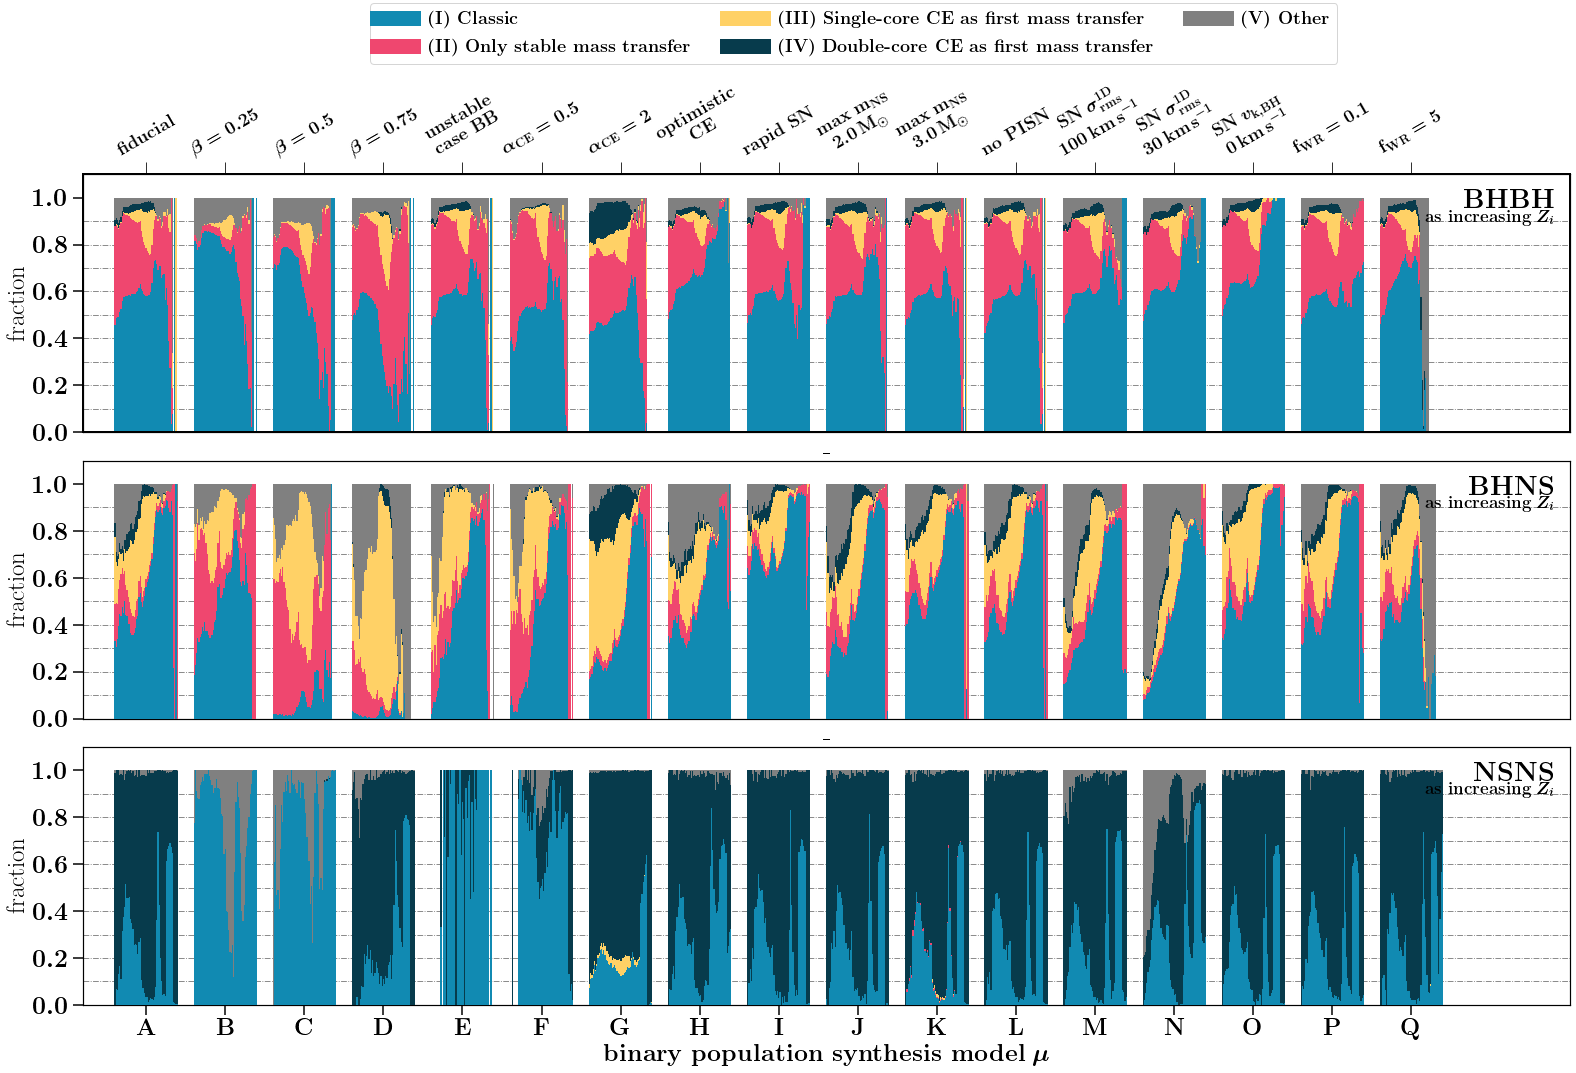

In [140]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
# CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,1.1],[0,1.1],[0,1.1]]


pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/'    

plotFormationChannelRates_vbars(csvFilePath=pathCSVfile)

## ABSOLUTE NUMBER: 

In [141]:
def plotFormationChannelRates_vbars_absolute(csvFilePath):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,14), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    channelColorDict = {'I_classic':'#118AB2', 'II_only_stable_MT':'#EF476F',  'III_single_core_CE':'#FFD166', 'IV_double_core_CE':'#073B4C', 'V_other':'gray'}
    List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    
    channel_names = ['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']
    
    
    

    
    Zinitial = [0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
   0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
   0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
   0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
   0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
   0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
   0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
   0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]
    nZ = len(Zinitial)
    
    dx = 0.4 #0.3

    dxlen = (2*dx)/nZ
    
    for ind_t, DCOtype in enumerate(Types):

        axe = axes[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        
        path_name = csvFilePath + 'formationRatesTotalAndPerChannel_'+ DCOname +'_.csv'
        df = pd.read_csv(path_name, index_col=0)

        for ind_bps, bps_name in enumerate(BPSnameslist):
            ratesRatio_low = np.zeros(nZ)
            ratesRatio     = np.zeros(nZ)
            
            
            

#             x_positions_ = range(nModels)
#             xx_ = dxrange
            x_positions = np.linspace(-dx, dx, nZ+1) 
            x_positions = ind_bps +  (x_positions[1:]+x_positions[:-1])/2   # take the center of the bins

#             print('len xx', len(x_positions))
            

#             print(len(totalrates))

                
                
            for ind_c, whichChannel in enumerate(channel_names):
                # pandas data key
                key_ = bps_name + ' ' + whichChannel + '  [Msun^{-1}]'
                rates = df[key_]
                
                
                ratesRatio += np.asarray(rates)#/np.asarray(totalrates)
                height = (ratesRatio-ratesRatio_low)
                axe.bar(x_positions, height=height,  bottom=ratesRatio_low, color=channelColorDict[whichChannel], alpha=1, \
                       width=dxlen, zorder=100)
                
                
                
                ratesRatio_low += np.asarray(rates)#/np.asarray(totalrates)


        xmin = -0.8
        xmax = nModels +1. # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
#             axe.text(18.5-0.04, ll, str(ll) +r'$\,$' , rotation = 0, fontsize = fs-4, color = 'gray', va='bottom', ha = 'right')#, weight = 'bold')
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '
        
        ylabel = 'fraction'
        
        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#             axe.set_yscale('log')


        # set physical labels on bottom
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{%s}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{as increasing} $Z_i$' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')




        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate(channel_names):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs-6, ncol=3,bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
    
#     draw_arrows(axes=axes)
    


    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
#     plt.savefig('./Rates_' + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./FormationChannels' +  '_vbars_absolute_rate.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()
    print()
    
    return

nModels=17


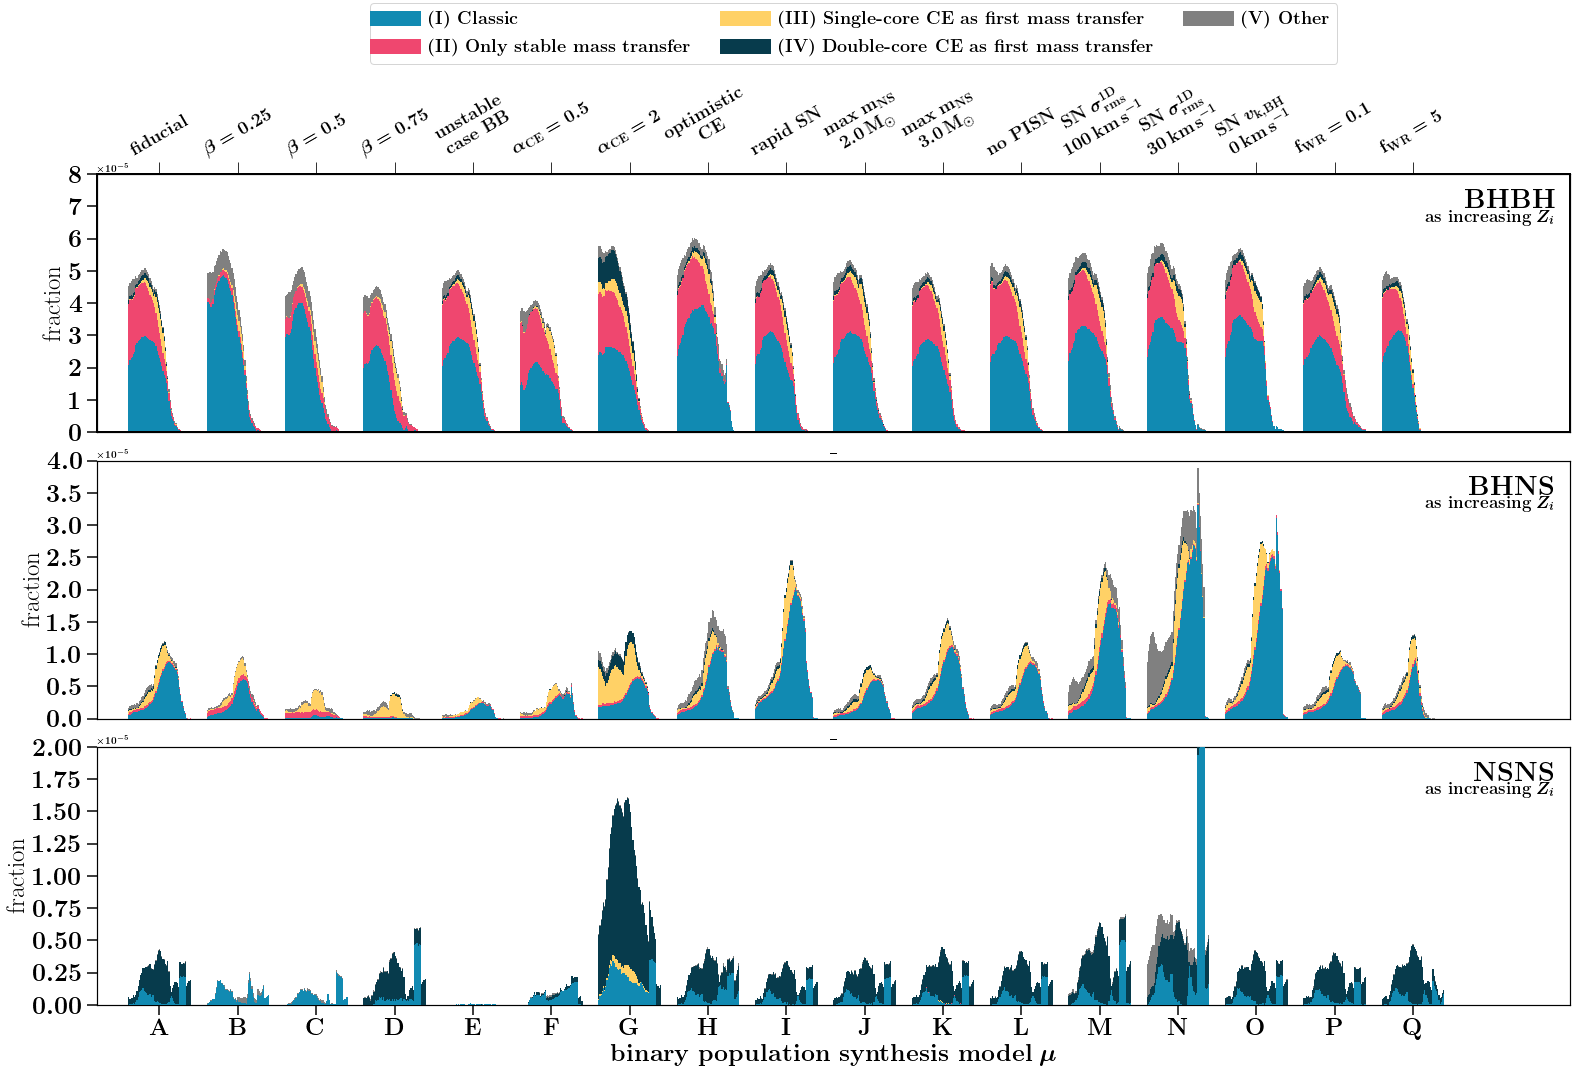

In [142]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
# CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,0.8*1E-4],[0,4*1E-5],[0,2*1E-5]]



pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/'    
plotFormationChannelRates_vbars_absolute(csvFilePath=pathCSVfile)


In [12]:
def draw_arrows(axes=None):

    # ARROWS:
    
#     ar_c = 'limegreen'
    ar_c = 'turquoise'
    ar_lw=4
    
    # BHBH
    axe =axes[0]
    # properties  arrow 
    strr = r"\textbf{Only Stable}" + '\n' + r'\textbf{mass transfer}' + '\n'   + r"\textbf{channel (II)}" + '\n'   + r"\textbf{dominates} "
    x_xy, y_xy = 16.1, 0.7
    x_xytext, y_xytext = 17.8, 0.3
    conn = "angle3,angleA=90,angleB=0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=15, va="center", ha="right",
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", ec=ar_c , lw=ar_lw), zorder=20000)    
    
    
    

    # BHNS 
    axe =axes[1]
    # properties  arrow 
    strr = r"\textbf{Classic CE}" + '\n' + r'\textbf{channel (I)}' + '\n' +r"\textbf{dominates} "
    x_xy, y_xy = 16.1, 0.14
    x_xytext, y_xytext = 17.9, 0.54
    conn = "angle,angleA=-90,angleB=180,rad=0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=15, va="center", ha="right",
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", ec=ar_c , lw=ar_lw), zorder=20000)
    
    
    
    # NSNS 
    axe =axes[2]
    # properties  arrow 
    strr = r"\textbf{Double-core CE}" + '\n' + r'\textbf{channel (IV)}' + '\n' +r"\textbf{dominates} "
    x_xy, y_xy = 16.1, 0.7
    x_xytext, y_xytext = 17.9, 0.3
    conn = "angle3,angleA=90,angleB=0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=15, va="center", ha="right",
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", ec=ar_c , lw=ar_lw), zorder=20000)
    
    